## Forecasting Timeseries
1. Engineer monthly dummy and trend variables, then fit a regression model and forecast two years worth of airline data (24 months).

2. Review the accuracy - and then try fitting the regression by using a log transform of the target variable.

3. Next, fit a Facebook Prophet model and compare the accuracy of Prophet to your Linear Regression model.

In [7]:
import pandas as pd

air_traffic = pd.read_csv("../Data/AirPassengers.csv", parse_dates=["Month"])

air_traffic.head()

,Month,Passengers (k)
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<Axes: xlabel='Month'>

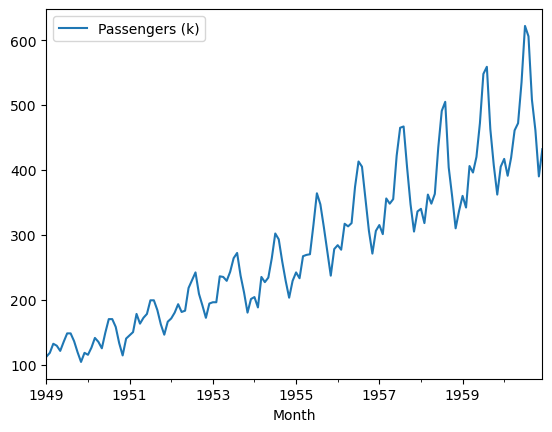

In [8]:
air_traffic.set_index("Month").plot()

### Linear Regression Forecasting

In [48]:
import numpy as np

air_traffic = air_traffic.assign(
    trend= air_traffic.index,
    month = air_traffic["Month"].dt.month.astype("string"),
)
air_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           144 non-null    datetime64[ns]
 1   Passengers (k)  144 non-null    int64         
 2   trend           144 non-null    int64         
 3   month_10        144 non-null    int64         
 4   month_11        144 non-null    int64         
 5   month_12        144 non-null    int64         
 6   month_2         144 non-null    int64         
 7   month_3         144 non-null    int64         
 8   month_4         144 non-null    int64         
 9   month_5         144 non-null    int64         
 10  month_6         144 non-null    int64         
 11  month_7         144 non-null    int64         
 12  month_8         144 non-null    int64         
 13  month_9         144 non-null    int64         
 14  month           144 non-null    string        
dtypes: dat

In [49]:
air_traffic = pd.get_dummies(
    air_traffic,
    drop_first=True,
    dtype="int"
)
air_traffic

,Month,Passengers (k),trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1949-01-01,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1949-02-01,118,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1949-03-01,132,2,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1949-04-01,129,3,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1949-05-01,121,4,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,606,139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
140,1960-09-01,508,140,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
141,1960-10-01,461,141,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,1960-11-01,390,142,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
#Split train and test datasets
air_traffic_train = air_traffic[:-24]
air_traffic_test = air_traffic[-24:]

In [51]:
air_traffic_train

,Month,Passengers (k),trend,month_10,month_11,month_12,month_2,month_3,month_4,month_5,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,1949-01-01,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1949-02-01,118,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1949-03-01,132,2,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1949-04-01,129,3,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1949-05-01,121,4,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1958-08-01,505,115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
116,1958-09-01,404,116,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117,1958-10-01,359,117,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118,1958-11-01,310,118,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
import numpy as np

air_traffic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           120 non-null    datetime64[ns]
 1   Passengers (k)  120 non-null    int64         
 2   trend           120 non-null    int64         
 3   month_10        120 non-null    int64         
 4   month_11        120 non-null    int64         
 5   month_12        120 non-null    int64         
 6   month_2         120 non-null    int64         
 7   month_3         120 non-null    int64         
 8   month_4         120 non-null    int64         
 9   month_5         120 non-null    int64         
 10  month_6         120 non-null    int64         
 11  month_7         120 non-null    int64         
 12  month_8         120 non-null    int64         
 13  month_9         120 non-null    int64         
 14  month_10        120 non-null    int64         
 15  month_

In [53]:
# Create the OLS model
import statsmodels.api as sm

X = sm.add_constant(air_traffic_train.iloc[:,2:])
y = np.log(air_traffic_train["Passengers (k)"])

model = sm.OLS(y ,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Passengers (k)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     498.2
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           5.70e-88
Time:                        14:20:58   Log-Likelihood:                 185.15
No. Observations:                 120   AIC:                            -344.3
Df Residuals:                     107   BIC:                            -308.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7162      0.019    248.075      0.000       4.678       4.754
trend          0.0106      0.000     73.217      0.000       0.010       0.011
month_10       0.0005      0.012      0.044      0.965      -0.024       0.025
month_11      -0.0707      0.012     -5.765      0.000      -0.095      -0.046
month_12      -0.0124      0.012     -1.012      0.314      -0.037       0.012
month_2       -0.0067      0.012     -0.549      0.584      -0.031       0.018
month_3        0.0601      0.012      4.907      0.000       0.036       0.084
month_4        0.0386      0.012      3.147      0.002       0.014       0.063
month_5        0.0337      0.012      2.754      0.007       0.009       0.058
month_6        0.0957      0.012      7.806      0.000       0.071       0.120
month_7        0.1438      0.012     11.729      0.000       0.119       0.168
month_8        0.1392      0.012     11.356      0.000       0.115       0.164
month_9        0.0714      0.012      5.823      0.000       0.047       0.096
month_10       0.0005      0.012      0.044      0.965      -0.024       0.025
month_11      -0.0707      0.012     -5.765      0.000      -0.095      -0.046
month_12      -0.0124      0.012     -1.012      0.314      -0.037       0.012
month_2       -0.0067      0.012     -0.549      0.584      -0.031       0.018
month_3        0.0601      0.012      4.907      0.000       0.036       0.084
month_4        0.0386      0.012      3.147      0.002       0.014       0.063
month_5        0.0337      0.012      2.754      0.007       0.009       0.058
month_6        0.0957      0.012      7.806      0.000       0.071       0.120
month_7        0.1438      0.012     11.729      0.000       0.119       0.168
month_8        0.1392      0.012     11.356      0.000       0.115       0.164
month_9        0.0714      0.012      5.823      0.000       0.047       0.096
==============================================================================
Omnibus:                        3.463   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.283
Skew:                          -0.405   Prob(JB):                        0.194
Kurtosis:                       2.963   Cond. No.                     6.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
pd.Series(model.predict())

0      4.716162
1      4.713346
2      4.857631
3      4.825132
4      4.826125
         ...   
115    6.216120
116    6.091123
117    5.960015
118    5.828079
119    5.955347
Length: 120, dtype: float64

In [55]:
air_traffic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 120 to 143
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           24 non-null     datetime64[ns]
 1   Passengers (k)  24 non-null     int64         
 2   trend           24 non-null     int64         
 3   month_10        24 non-null     int64         
 4   month_11        24 non-null     int64         
 5   month_12        24 non-null     int64         
 6   month_2         24 non-null     int64         
 7   month_3         24 non-null     int64         
 8   month_4         24 non-null     int64         
 9   month_5         24 non-null     int64         
 10  month_6         24 non-null     int64         
 11  month_7         24 non-null     int64         
 12  month_8         24 non-null     int64         
 13  month_9         24 non-null     int64         
 14  month_10        24 non-null     int64         
 15  month

In [56]:
y_test = np.log(air_traffic_test["Passengers (k)"])
model.predict(y_test)

None    33.845892
dtype: float64

In [58]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

print(f"MAPE: {mape(np.log(air_traffic_test['Passengers (k)']), model.predict(sm.add_constant(air_traffic_test.iloc[:, 2:])))}")
print(f"MAE: {mae(np.log(air_traffic_test['Passengers (k)']), model.predict(sm.add_constant(air_traffic_test.iloc[:, 2:])))}")

MAPE: 0.015492607705910974
MAE: 0.09384410879641003


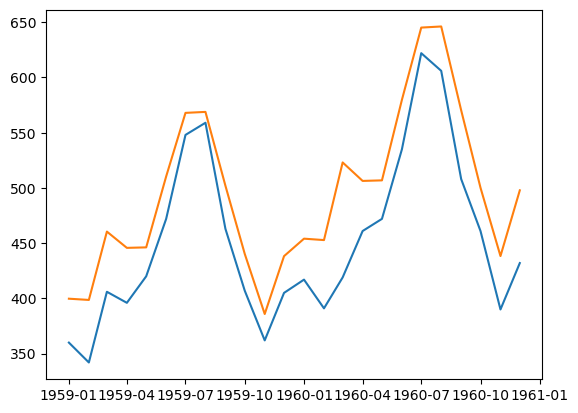

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(air_traffic_test["Month"], air_traffic_test["Passengers (k)"])
# ax.plot(air_traffic_test["Month"], model.predict(sm.add_constant(air_traffic_test.iloc[:, 2:])))
ax.plot(air_traffic_test["Month"], np.exp(model.predict(sm.add_constant(air_traffic_test.iloc[:, 2:]))))

### Facebook Prophet Model

In [60]:
air_traffic = (
    pd.read_csv(
        "../Data/AirPassengers.csv", 
        usecols=["Passengers (k)", "Month"], 
        parse_dates=["Month"])
    .rename({"Month": "ds", "Passengers (k)": "y"}, axis=1)
)

air_traffic.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [61]:
air_traffic_train = air_traffic[:-24]
air_traffic_test = air_traffic[-24:]

In [63]:
from prophet import Prophet

m = Prophet(seasonality_mode = "multiplicative") # seasonality_mode = "multiplicative"
m.fit(air_traffic_train);

15:10:20 - cmdstanpy - INFO - Chain [1] start processing
15:10:20 - cmdstanpy - INFO - Chain [1] done processing


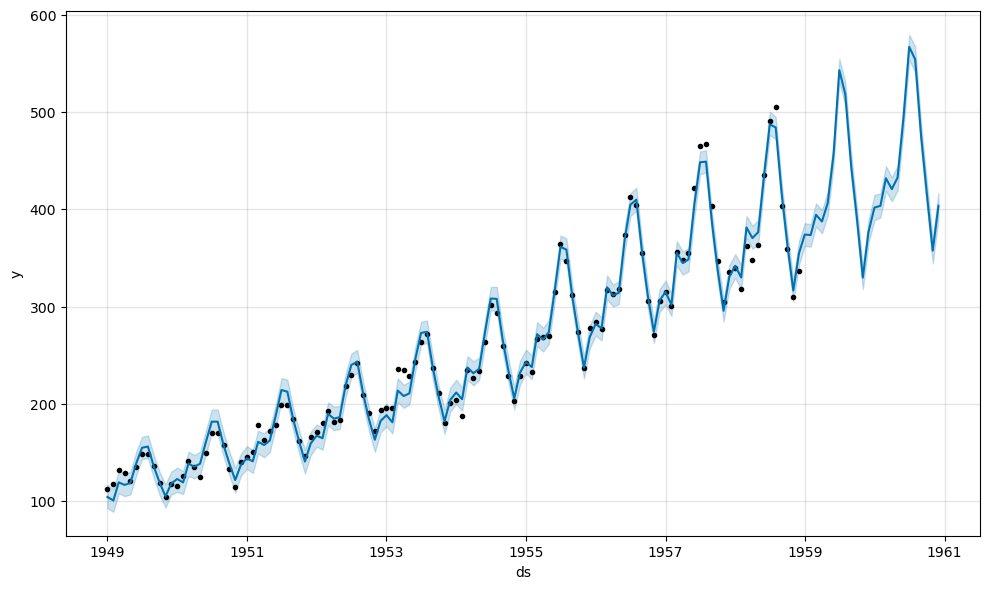

In [65]:
future = m.make_future_dataframe(periods=24, freq="ME")

forecast = m.predict(future)

m.plot(forecast);

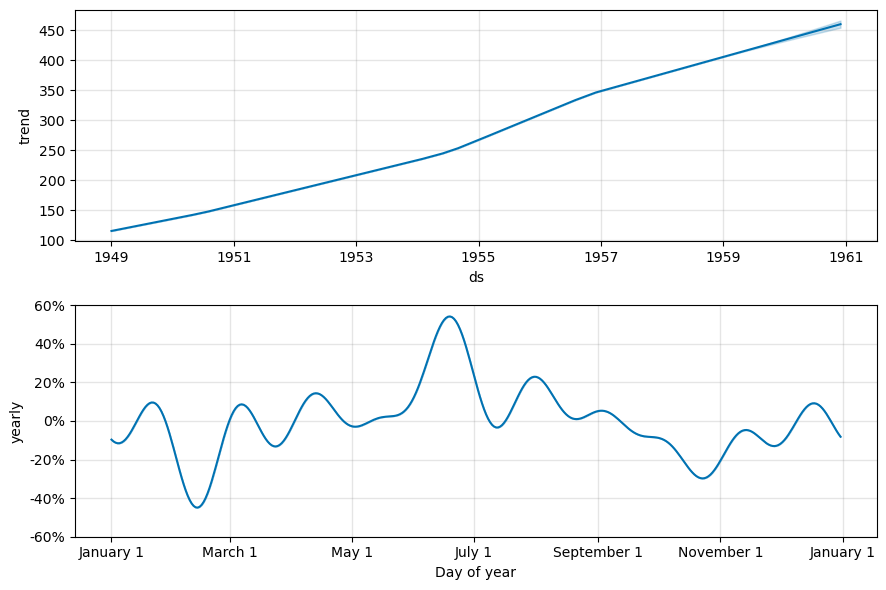

In [66]:
fig = m.plot_components(forecast)

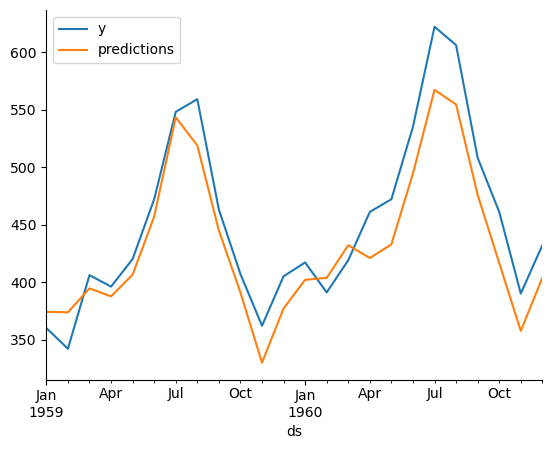

In [71]:
import seaborn as sns

(air_traffic_test
 .assign(predictions = m.predict(future)["yhat"])
 .set_index("ds")
 .plot()
)

sns.despine()

In [72]:
forecast = m.predict(future).iloc[-24:, -1]

In [73]:
print(f"MAPE: {mape(air_traffic_test['y'], forecast)}")
print(f"MAE: {mae(air_traffic_test['y'], forecast)}")

MAPE: 0.05793354397435955
MAE: 26.593740206681826
